## Pipeline

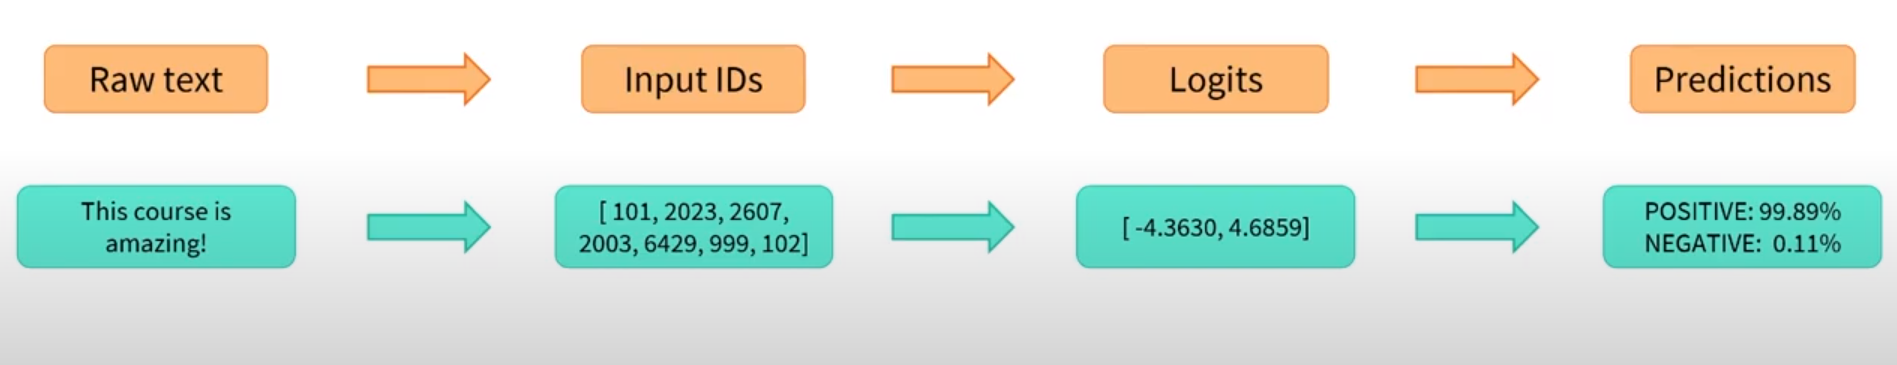

In [1]:
from transformers import pipeline

2022-11-16 17:38:17.146727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 17:38:17.618699: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 17:38:18.597130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/anwer/anaconda3/lib/
2022-11-16 17:38:18.597195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [4]:
classifier = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
classifier(["This is good"])

[{'label': 'POSITIVE', 'score': 0.9998360872268677}]

### Tokenizer

In [6]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [7]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [8]:
raw_inputs = ["I am good enough to crack any interview",
             "I hate this too much"]

In [9]:
inputs = tokenizer(raw_inputs,padding=True,truncation = True, return_tensors = "pt") #pt is for pytorch

In [10]:
inputs

{'input_ids': tensor([[ 101, 1045, 2572, 2204, 2438, 2000, 8579, 2151, 4357,  102],
        [ 101, 1045, 5223, 2023, 2205, 2172,  102,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}

### Model

In [12]:
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [13]:
model = AutoModel.from_pretrained(checkpoint)
output = model(**inputs)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
output.last_hidden_state.shape

torch.Size([2, 10, 768])

### AutoModel for classification Problem

In [20]:
from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In [23]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [24]:
outputs = model(**inputs)

In [25]:
outputs.logits

tensor([[-4.2789,  4.6934],
        [ 4.4130, -3.5961]], grad_fn=<AddmmBackward0>)

In [26]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits,dim = -1)
print(predictions)

tensor([[1.2687e-04, 9.9987e-01],
        [9.9967e-01, 3.3230e-04]], grad_fn=<SoftmaxBackward0>)


In [27]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}